## Import Module Micrograd

In [1]:
from Micrograd import Value, Graph

In [2]:
x1 = Value(2.0, label="x1")
x2 = Value(0.0, label="x2")

w1 = Value(-3.0, label="w1")
w2 = Value(1.0, label="w2")

b = Value(6.8813735, label="b")

x1w1 = x1 * w1; x1w1.label = "x1w1"
x2w2 = x2 * w2; x2w2.label = "x2w2"
x1w1x2w2 = x1w1 + x2w2; x1w1x2w2.label = "x1w1+x2w2"
n = x1w1x2w2 + b; n.label = "n"
o = n.tanh(); o.label = "o"

#### Draw graph without backpropagation

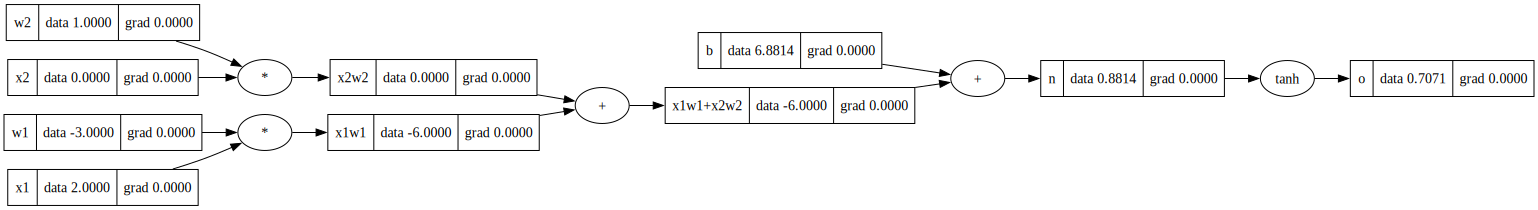

In [3]:
graph = Graph(o)
graph.draw()

use backpropagation to calculate the gradient of the function

In [4]:
o.backward()

#### With backpropagation

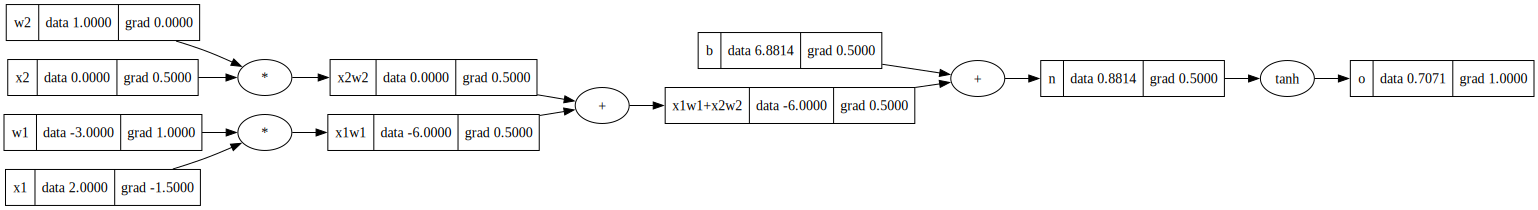

In [5]:
graph.draw()

#### With Multiple Linking Nodes

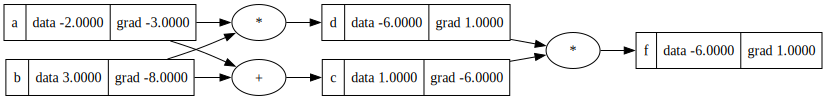

In [6]:
a = Value(-2.0, label="a")
b = Value(3.0, label="b")

c = a + b; c.label = "c"
d = a * b; d.label = "d"

f = c * d; f.label = "f"
f.backward()

graph = Graph(f)
graph.draw()

## Use the sample with PyTorch

In [7]:
import torch

In [ ]:
x1 = torch.Tensor([2.0]).double() ; x1.requires_grad = True
x2 = torch.Tensor([0.0]).double() ; x2.requires_grad = True

w1 = torch.Tensor([-3.0]).double() ; w1.requires_grad = True
w2 = torch.Tensor([1.0]).double() ; w2.requires_grad = True

b = torch.Tensor([6.8813735]).double() ; b.requires_grad = True

n = x1 * w1 + x2 * w2 + b
o = n.tanh()

# backward pass
o.backward()

print(x1.grad, x2.grad, w1.grad, w2.grad, b.grad)

tensor([-1.5000], dtype=torch.float64) tensor([0.5000], dtype=torch.float64) tensor([1.0000], dtype=torch.float64) tensor([0.], dtype=torch.float64) tensor([0.5000], dtype=torch.float64)
